# Lab 04
## Comparing Decision tree and SVM

### Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv("cancerAllv3.csv")
df.head()

C:\Users\jyosn\AppData\Local\Temp\ipykernel_16144\3637813710.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,radius,texture,perimeter,area,s,c,concavity,cp,sym,fd,...,texture2,perimeter2,area2,s2,c2,concavity2,cp2,sym2,fd2,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


>This dataset has 31 columns.

In [2]:
features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']       
import numpy as np
X = np.array(df)
y = X[:,30]
X = X[:,0:9]

- We now split the dataset.
- The parameter `random_state` is used for reproducibility of code. It ensures that the split is same each time we run this code. If we set it to None then the split will change every time.
- `shuffle` prevents bias due to order. It shuffles the rows randomly before splitting.
- `test_size `: The fraction of data that goes into test set.

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                            random_state=104,
                                            test_size=0.25,  shuffle=True)

(426, 9)


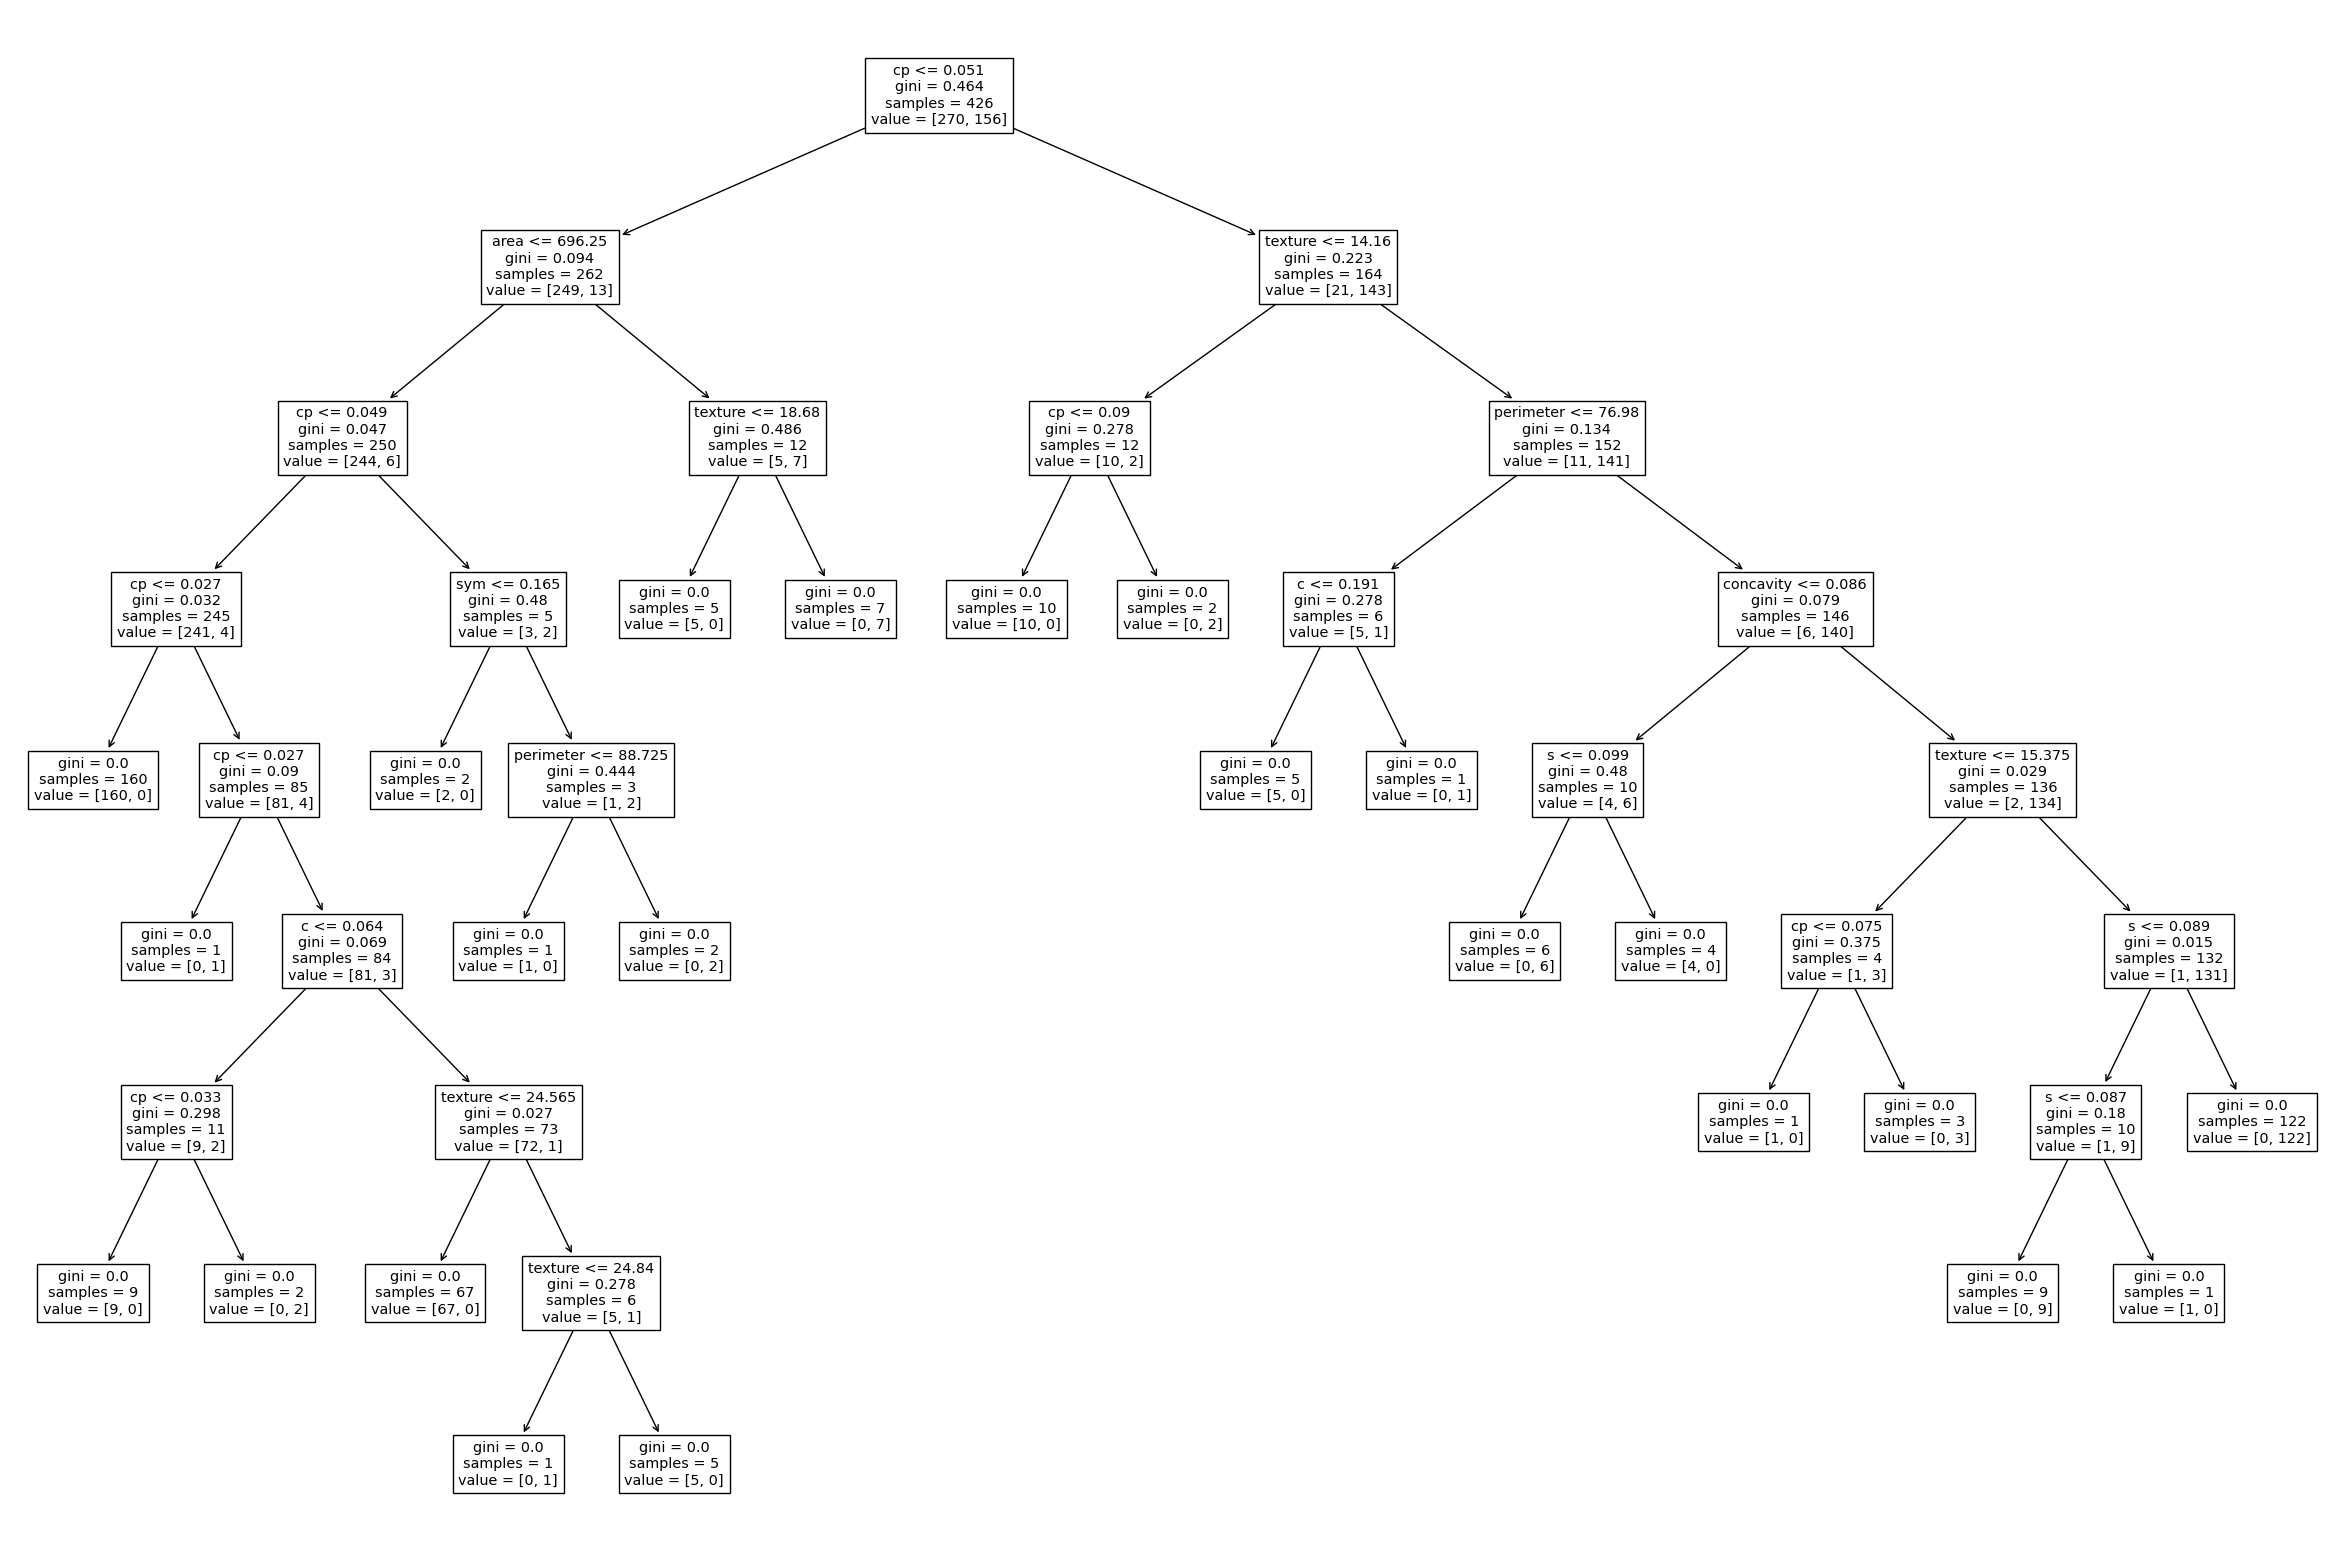

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(criterion='gini')
dtree = dtree.fit(X_train, y_train)
plt.figure(figsize=(30,20))
tree.plot_tree(dtree,feature_names=features)

print(X_train.shape)

In [5]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
predicted = dtree.predict(X_train)
print (accuracy_score(y_train, predicted))

1.0


In [6]:
predicted = dtree.predict(X_test)
print (accuracy_score(y_test, predicted))

0.916083916083916


Thus, the test accuracy of decision tree is 92%.

**Classification report**

In [7]:
print(classification_report(y_test,predicted,labels=[0.0,1.0]))
# labels should be the exact name of the categories

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        87
         1.0       0.91      0.88      0.89        56

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



**Confusion Matrix**

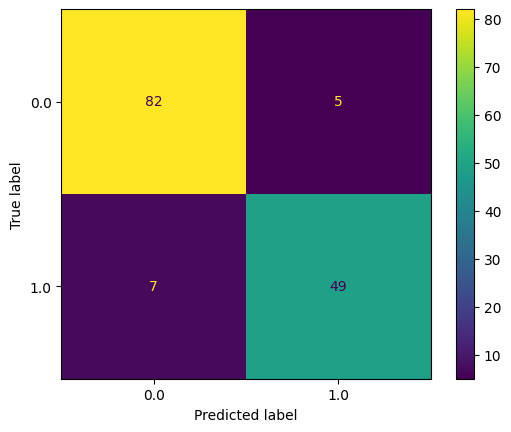

In [8]:
cm=confusion_matrix(y_test,predicted)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=dtree.classes_)
fig.plot()

**HYPERPARAMETER TUNING**

In [9]:
para={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'min_samples_leaf':[2,4,6,8],
    'max_depth':[2,3,4,5]
}
from sklearn.model_selection import GridSearchCV
dtree_tuned=GridSearchCV(dtree,para,cv=10,scoring='accuracy')
dtree_tuned.fit(X_train,y_train)
#getting best parameters from gridsearch cv
print(dtree_tuned.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'splitter': 'best'}


In [10]:
tuned_predictions=dtree_tuned.predict(X_test)


**Classification report after Hyperparameter Tuning**

In [11]:
print(classification_report(y_test,tuned_predictions,labels=[0.0,1.0]))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        87
         1.0       0.86      0.91      0.89        56

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.91       143
weighted avg       0.91      0.91      0.91       143



### SVM

In [12]:
features=['radius','texture','perimeter','area','s','c','concavity','cp','sym']

In [13]:
from sklearn.svm import SVC 

In [22]:
clf = SVC(kernel='poly') 

# fitting x samples and y classes 
clf.fit(X_train, y_train) 

predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))


0.8896713615023474


In [23]:

predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))


0.8881118881118881


**Classification report**

In [24]:
print(classification_report(y_test,predicted,labels=[0.0,1.0]))
# labels should be the exact name of the categories


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        87
         1.0       0.95      0.75      0.84        56

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.88       143
weighted avg       0.90      0.89      0.89       143



**Confusion Matrix**

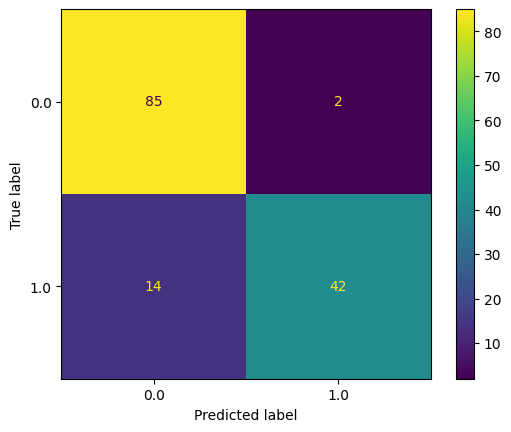

In [25]:
cm=confusion_matrix(y_test,predicted)
fig=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
fig.plot()


**HYPERPARAMETER TUNING**

In [26]:
para={
    'kernel':['linear','rbf','poly'],
}
clf_tuned=GridSearchCV(clf,para,cv=10,scoring='accuracy')
clf_tuned.fit(X_train,y_train)
#getting best parameters from gridsearch cv
print(clf_tuned.best_params_)

clf_tuned_predictions=clf_tuned.predict(X_test)


{'kernel': 'linear'}


**Classification report after Hyperparameter Tuning**

In [27]:
print(classification_report(y_test,clf_tuned_predictions,
                            
                            labels=[0.0,1.0]))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        87
         1.0       0.89      0.86      0.87        56

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.90       143
weighted avg       0.90      0.90      0.90       143

